# Importing Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
path_dataset = "/content/CO2 Emissions_Canada.csv"
df = pd.read_csv(path_dataset)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.shape

(7385, 12)

In [ ]:
# Renaming Columns
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'}, inplace=True)

In [ ]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [ ]:
# Checking Missing/NaN/Null values
df.isna().sum()

,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel_type,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0


In [ ]:
# Checking Duplicates
df.duplicated().sum()

1103

In [ ]:
# Drop duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(6282, 12)

## Finding Outliers

### Using IQR

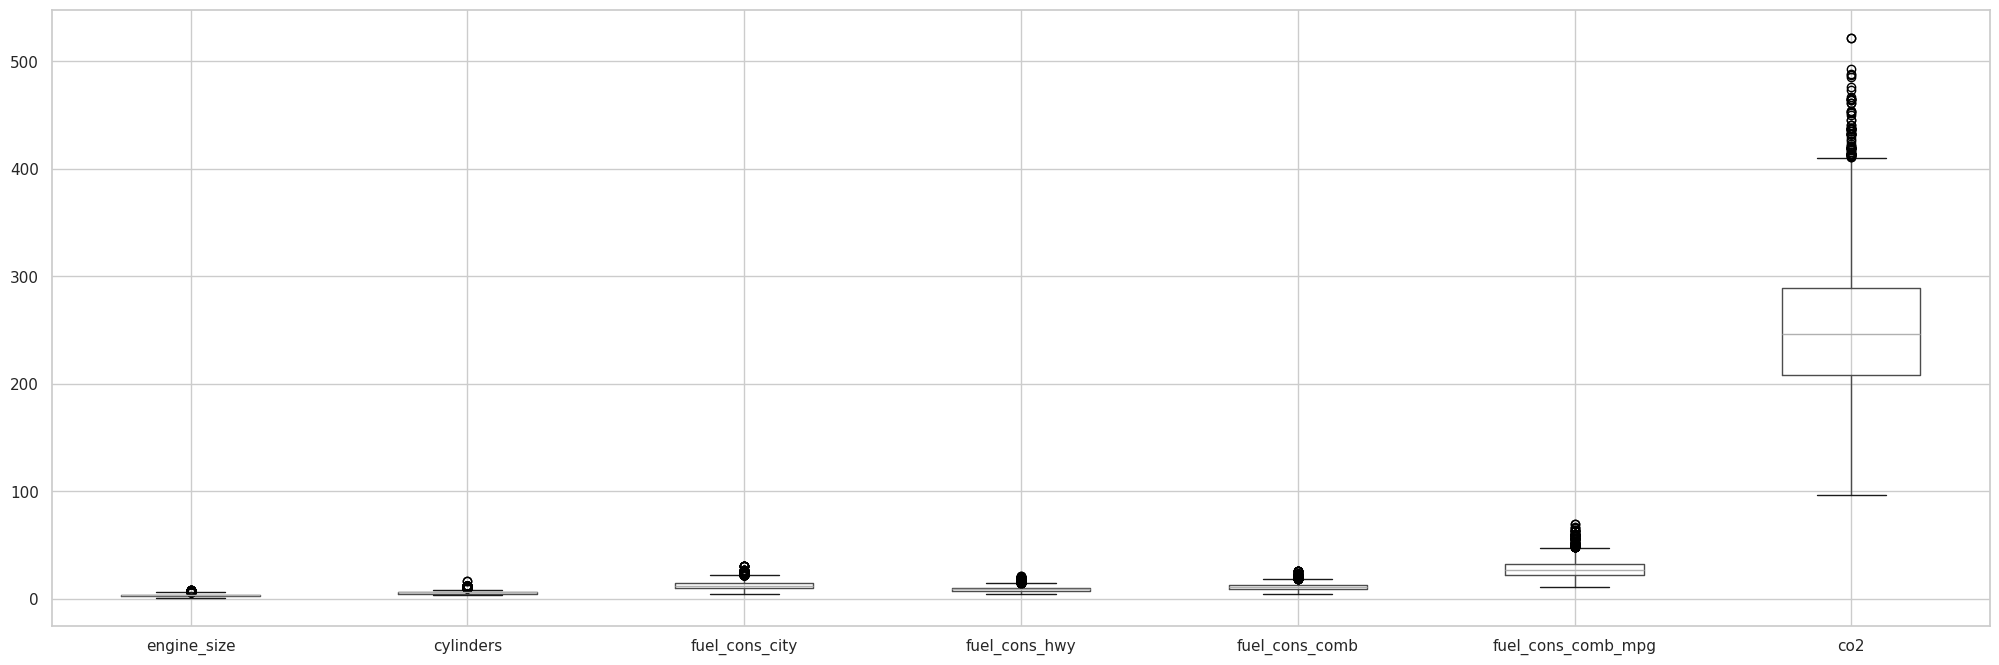

In [ ]:
plt.figure(figsize=(25,8))
df.boxplot()
plt.show()

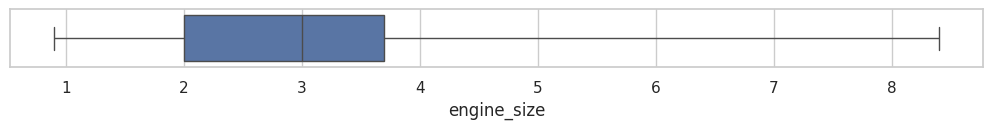

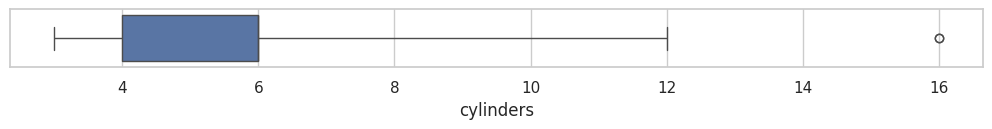

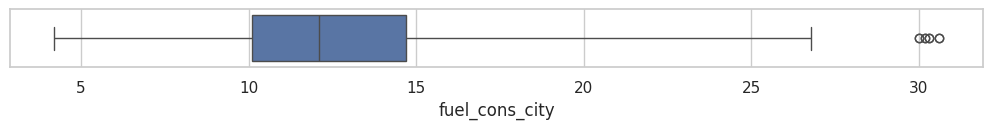

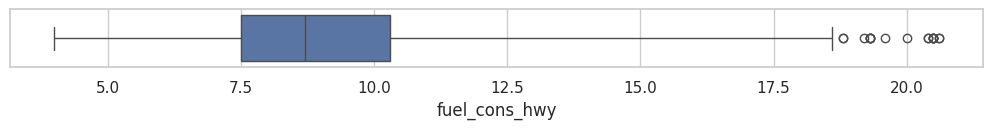

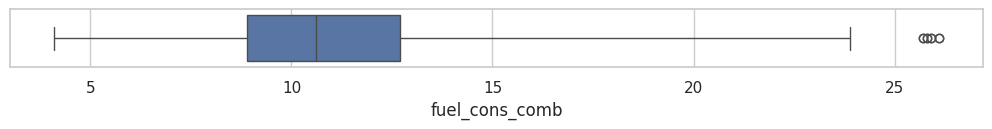

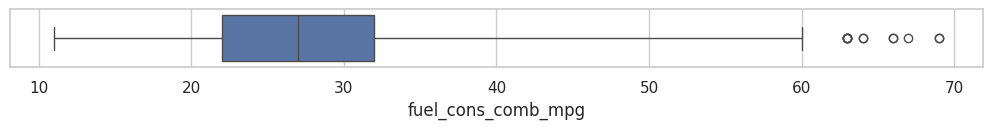

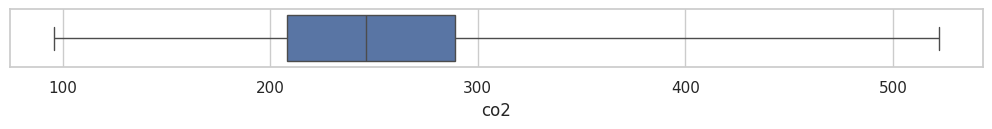

In [ ]:
index=0

for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(20,15))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3)

    plt.tight_layout()

    plt.show()

#### Outlier Fuel Consumption City

####  Outlier Cylinders

In [ ]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)

(Q1,Q3)

(4.0, 6.0)

In [ ]:
IQR = Q3-Q1
IQR

2.0

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
(batas_bawah, batas_atas)

(1.0, 9.0)

In [ ]:
# outlier dari cylinders

df[ (df['cylinders']< batas_bawah) | (df['cylinders']> batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
14,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
19,ASTON MARTIN,VANQUISH,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
36,AUDI,A8L,FULL-SIZE,6.3,12,AS8,Z,18.7,11.5,15.5,18,363
47,AUDI,R8,TWO-SEATER,5.2,10,A7,Z,18.2,10.6,14.8,19,347
...,...,...,...,...,...,...,...,...,...,...,...,...
7286,ROLLS-ROYCE,Cullinan Black Badge,STATION WAGON - MID-SIZE,6.7,12,AS8,Z,20.1,12.1,16.5,17,386
7287,ROLLS-ROYCE,Dawn,COMPACT,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7288,ROLLS-ROYCE,Ghost,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7289,ROLLS-ROYCE,Ghost EWB,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400


####  Outlier Engine Size

In [ ]:
Q1 = df['engine_size'].quantile(0.25)
Q3 = df['engine_size'].quantile(0.75)
Q1,Q3

(2.0, 3.7)

In [ ]:
IQR = Q3-Q1
IQR

1.7000000000000002

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(-0.5500000000000003, 6.25)

In [ ]:
# outlier dari engine_size

df[ (df['engine_size']<batas_bawah) | (df['engine_size']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
36,AUDI,A8L,FULL-SIZE,6.3,12,AS8,Z,18.7,11.5,15.5,18,363
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
290,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317
300,DODGE,CHALLENGER SRT,MID-SIZE,6.4,8,M6,Z,16.8,10.4,13.9,20,320
301,DODGE,CHALLENGER SRT (MDS),MID-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317
...,...,...,...,...,...,...,...,...,...,...,...,...
7286,ROLLS-ROYCE,Cullinan Black Badge,STATION WAGON - MID-SIZE,6.7,12,AS8,Z,20.1,12.1,16.5,17,386
7287,ROLLS-ROYCE,Dawn,COMPACT,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7288,ROLLS-ROYCE,Ghost,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7289,ROLLS-ROYCE,Ghost EWB,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400


In [ ]:
Q1 = df['fuel_cons_city'].quantile(0.25)
Q3 = df['fuel_cons_city'].quantile(0.75)
Q1,Q3

(10.1, 14.7)

In [ ]:
IQR = Q3-Q1
IQR

4.6

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(3.2, 21.599999999999998)

In [ ]:
# outlier dari fuel_cons_city

df[ (df['fuel_cons_city']<batas_bawah) | (df['fuel_cons_city']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
212,CHEVROLET,EXPRESS 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
214,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,E,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...
6836,FORD,T-150 Wagon FFV 4WD,VAN - PASSENGER,3.5,6,AS10,E,22.1,16.8,19.8,14,328
6870,GMC,Sierra FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,22.2,16.2,19.5,14,326
6879,GMC,Sierra 4WD FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,21.8,16.8,19.5,14,325
6902,GMC,Yukon XL 4WD FFV,SUV - STANDARD,5.3,8,A6,E,22.2,15.3,19.1,15,319


#### Outlier Fuel Consumption Highway

In [ ]:
Q1 = df['fuel_cons_hwy'].quantile(0.25)
Q3 = df['fuel_cons_hwy'].quantile(0.75)
Q1,Q3

(7.5, 10.3)

In [ ]:
IQR = Q3-Q1
IQR

2.8000000000000007

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
(batas_bawah, batas_atas)

(3.299999999999999, 14.500000000000002)

In [ ]:
# outlier dari fuel_cons_hwy

df[ (df['fuel_cons_hwy']<batas_bawah) | (df['fuel_cons_hwy']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
212,CHEVROLET,EXPRESS 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
214,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,E,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...
6836,FORD,T-150 Wagon FFV 4WD,VAN - PASSENGER,3.5,6,AS10,E,22.1,16.8,19.8,14,328
6870,GMC,Sierra FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,22.2,16.2,19.5,14,326
6879,GMC,Sierra 4WD FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,21.8,16.8,19.5,14,325
6902,GMC,Yukon XL 4WD FFV,SUV - STANDARD,5.3,8,A6,E,22.2,15.3,19.1,15,319


#### Outlier dari Fuel Consumption Comb

In [ ]:
Q1 = df['fuel_cons_comb'].quantile(0.25)
Q3 = df['fuel_cons_comb'].quantile(0.75)

Q1, Q3

(8.9, 12.7)

In [ ]:
IQR = Q3-Q1
IQR

3.799999999999999

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(3.200000000000002, 18.4)

In [ ]:
# outlier dari fuel_cons_comb

df[ (df['fuel_cons_comb']<batas_bawah) | (df['fuel_cons_comb']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
212,CHEVROLET,EXPRESS 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
214,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,E,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...
6836,FORD,T-150 Wagon FFV 4WD,VAN - PASSENGER,3.5,6,AS10,E,22.1,16.8,19.8,14,328
6870,GMC,Sierra FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,22.2,16.2,19.5,14,326
6879,GMC,Sierra 4WD FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,21.8,16.8,19.5,14,325
6902,GMC,Yukon XL 4WD FFV,SUV - STANDARD,5.3,8,A6,E,22.2,15.3,19.1,15,319


#### Outlier dari Fuel Consumption Comb (mpg)

In [ ]:
Q1 = df['fuel_cons_comb_mpg'].quantile(0.25)
Q3 = df['fuel_cons_comb_mpg'].quantile(0.75)

(Q1,Q3)

(22.0, 32.0)

In [ ]:
IQR = Q3-Q1
IQR

10.0

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(7.0, 47.0)

In [ ]:
# outlier dari fuel_cons_comb_mpg

df[ (df['fuel_cons_comb_mpg']<batas_bawah) | (df['fuel_cons_comb_mpg']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
415,FORD,FUSION HYBRID,MID-SIZE,2.0,4,AV,X,5.3,5.7,5.5,51,126
487,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,X,4.7,4.9,4.8,59,110
659,LEXUS,CT 200h,COMPACT,1.8,4,AV,X,5.5,5.8,5.6,50,129
975,TOYOTA,CAMRY HYBRID LE,MID-SIZE,2.5,4,AV,X,5.5,5.9,5.7,50,131
...,...,...,...,...,...,...,...,...,...,...,...,...
7119,LINCOLN,MKZ Hybrid,MID-SIZE,2.0,4,AV,X,5.5,5.7,5.6,50,131
7325,TOYOTA,Camry Hybrid LE,MID-SIZE,2.5,4,AV,X,4.9,4.8,4.9,58,113
7326,TOYOTA,Camry Hybrid XLE/SE,MID-SIZE,2.5,4,AV,X,5.3,5.0,5.1,55,121
7335,TOYOTA,Corolla Hybrid,COMPACT,1.8,4,AV,X,4.4,4.5,4.5,63,106


Text(0.5, 1.0, 'Make')

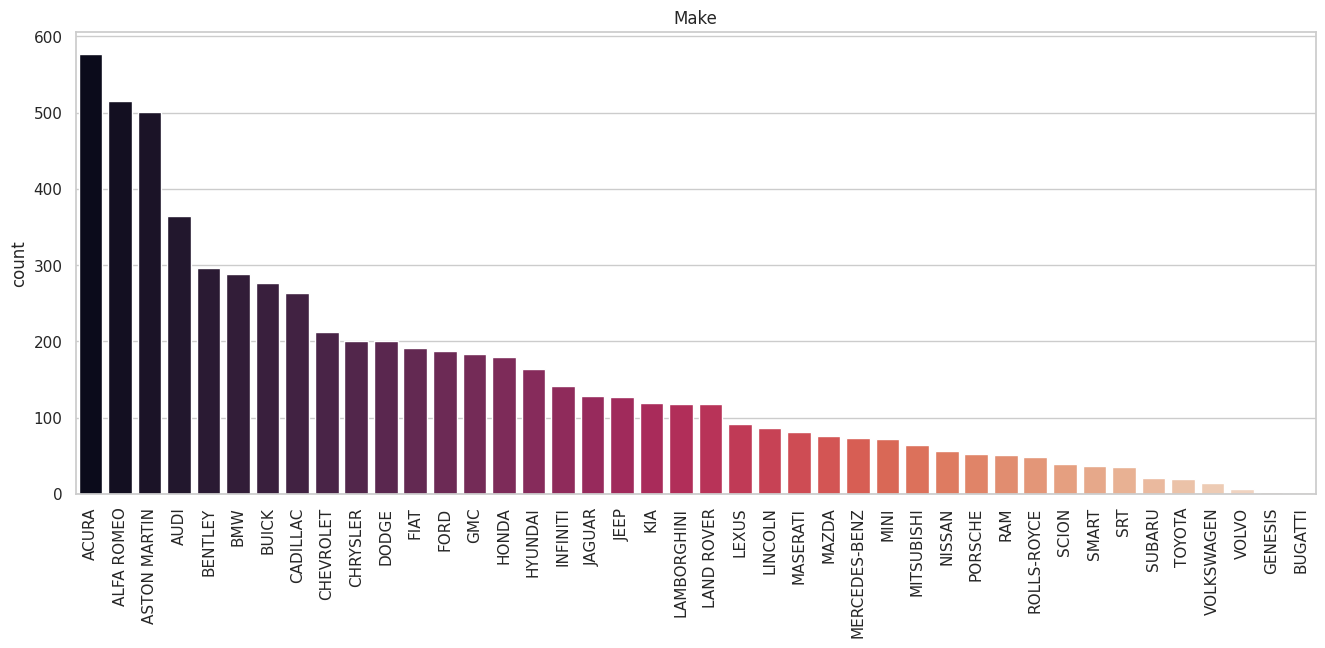

In [ ]:
x = df['make'].unique()
y = df['make'].value_counts()

plt.figure(figsize=(16,6))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.xticks(rotation=90)
plt.title("Make")

Text(0.5, 1.0, 'Fuel type')

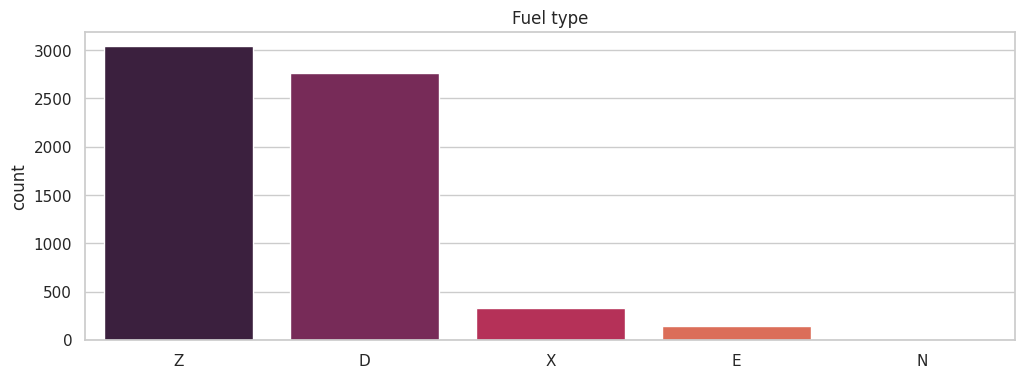

In [ ]:
x = df['fuel_type'].unique()
y = df['fuel_type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("Fuel type")

<ipython-input-203-f4b57cdce916>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='vehicle_class', palette='rocket')


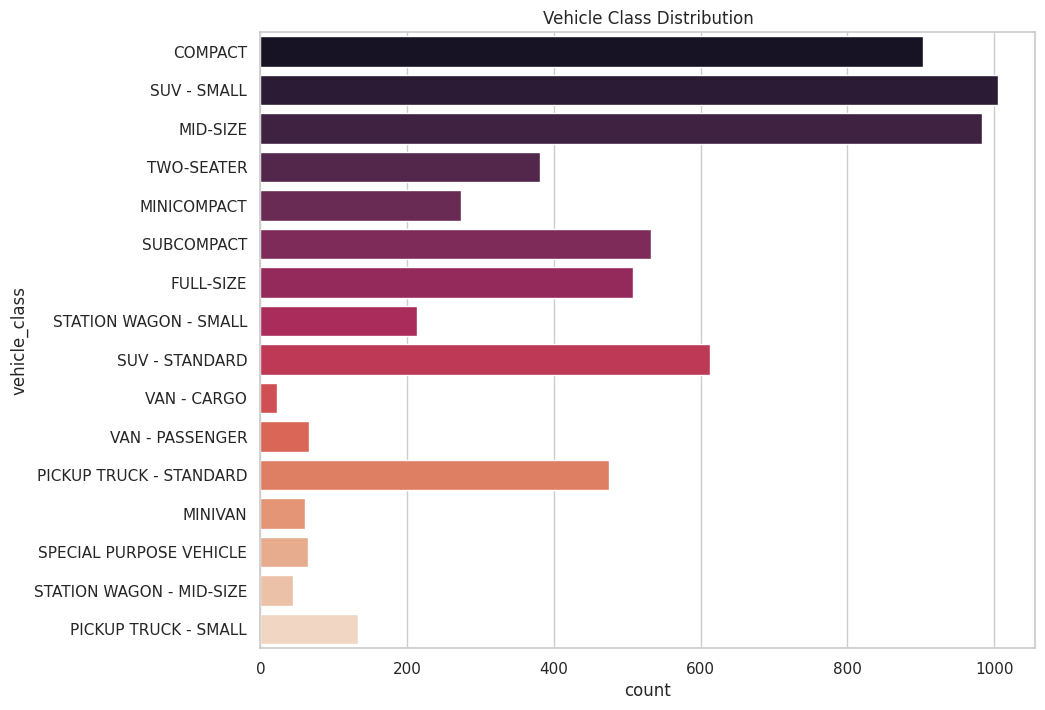

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='vehicle_class', palette='rocket')
plt.title('Vehicle Class Distribution')
plt.show()

Text(0.5, 1.0, 'Fuel type')

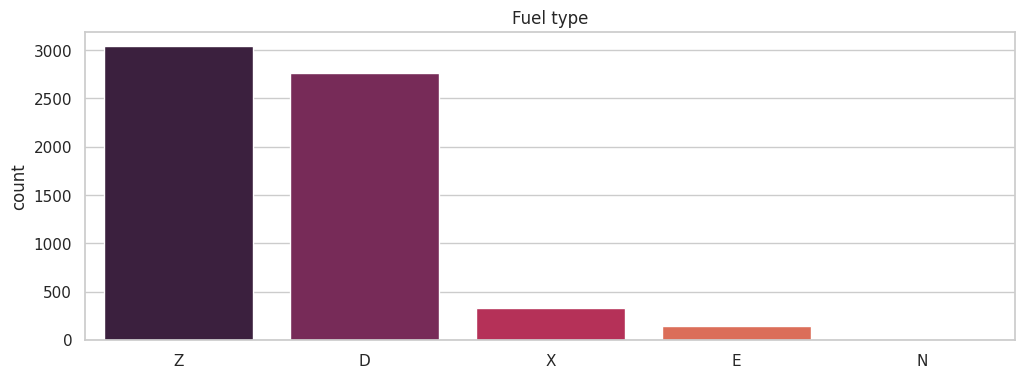

In [ ]:
x = df['fuel_type'].unique()
y = df['fuel_type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("Fuel type")

<ipython-input-205-b2bf79be33e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='transmission', palette='rocket')


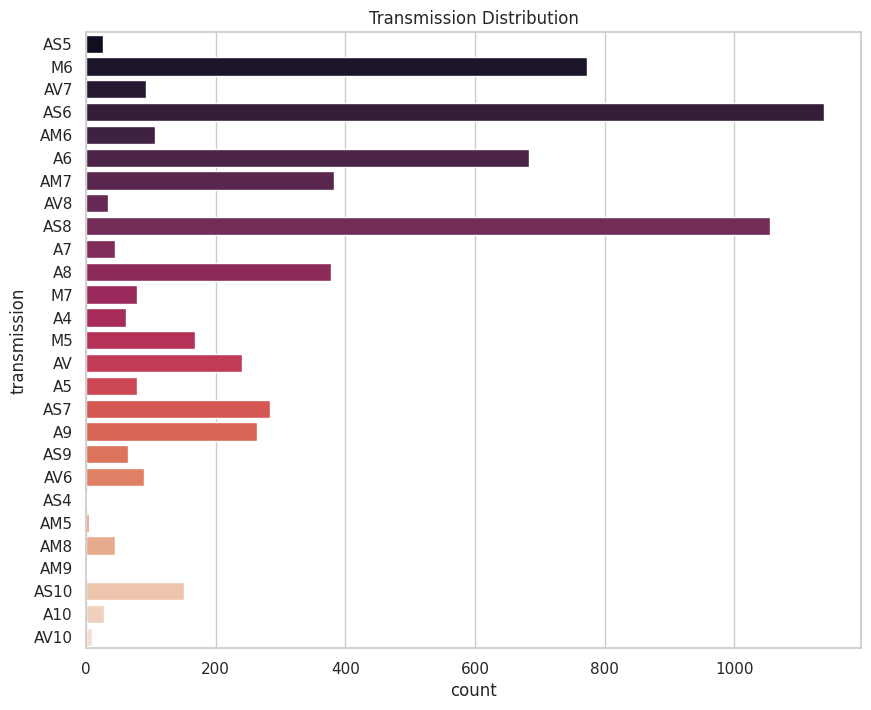

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='transmission', palette='rocket')
plt.title('Transmission Distribution')
plt.show()

Text(0.5, 1.0, 'engine Size')

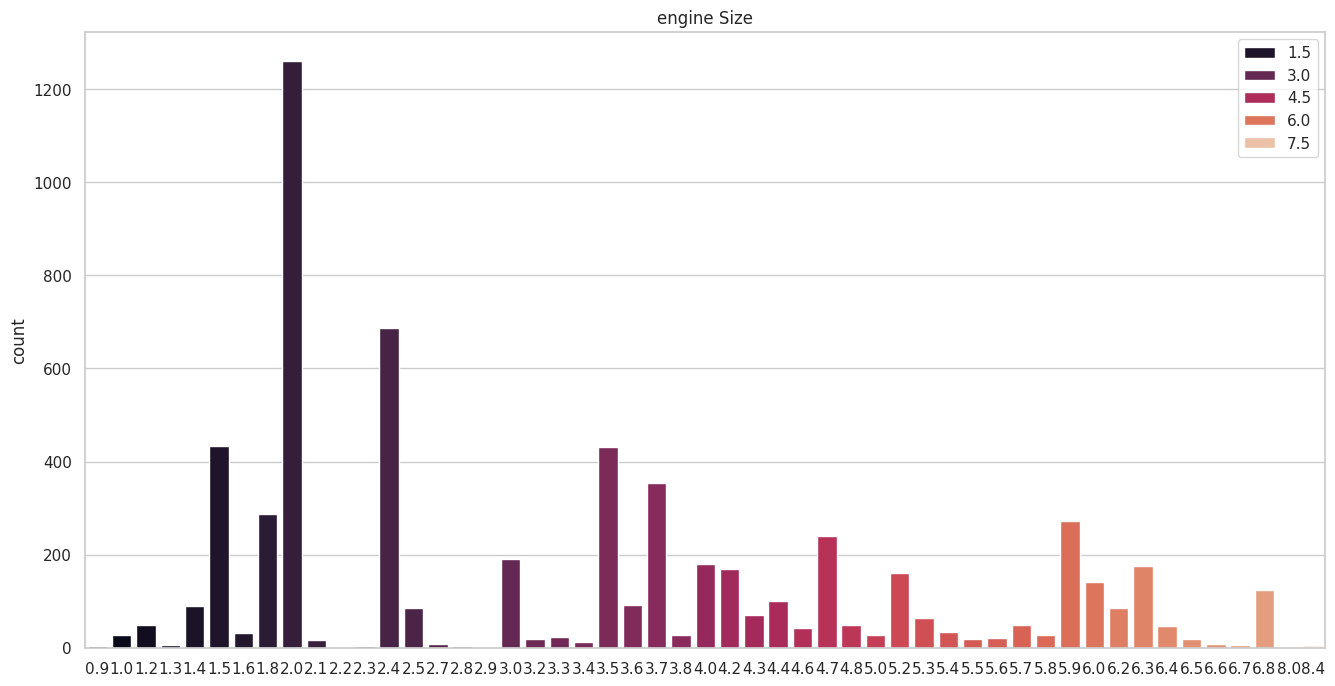

In [ ]:
x = df['engine_size'].unique()
y = df['engine_size'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("engine Size")

Text(0.5, 1.0, 'Cylinders Distribution')

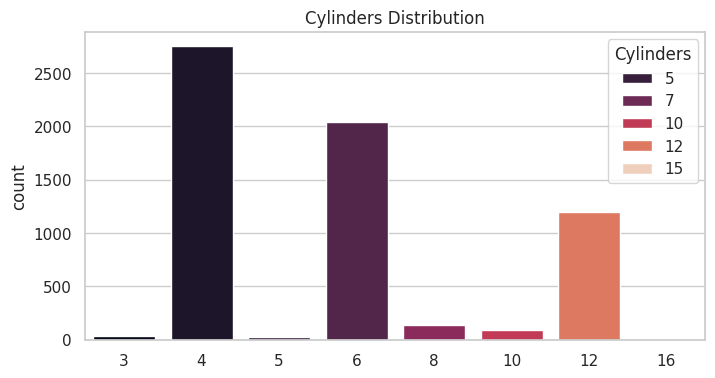

In [ ]:
x = df['cylinders'].unique()
y = df['cylinders'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x, legend=True)
plt.legend(title="Cylinders")
plt.title("Cylinders Distribution")

**CONCLUSION**

We can conclude that, from all the categorical features,

1. The use of fuels of diesel (D), ethanol (E), and natural gas (N) fuel in cars are very small compared to regular gas (X) and premium gas (Z)
2. Widespread use of AS6, AS8, M6, A6, A9 as transmission options
3. 4, 6, 8 sizes are the most used cylinders
4. Engine Size with 2.0 and 3.0 are the most common
5. Data is dominated by small vehicles (SUV-SMALL, MID-SIZE)

## **Bivariate (Coorelation between Numerical values)**

Text(0.5, 1.05, 'Feature Correlation')

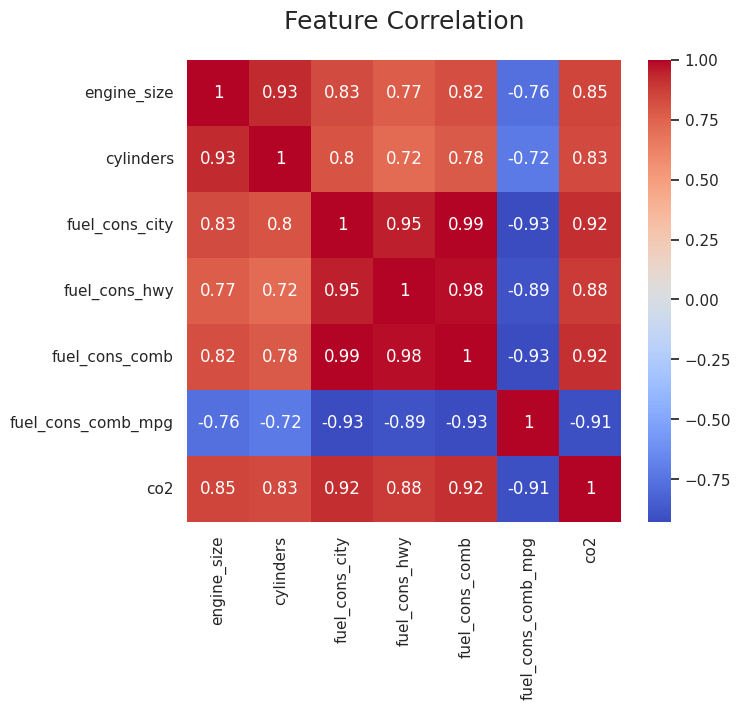

In [ ]:
plt.figure(figsize=(7,6))
num_feature = df.select_dtypes(include=['number'])
sns.heatmap(num_feature.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation', fontsize=18, y=1.05)

### **Which Make emits the most CO2?**

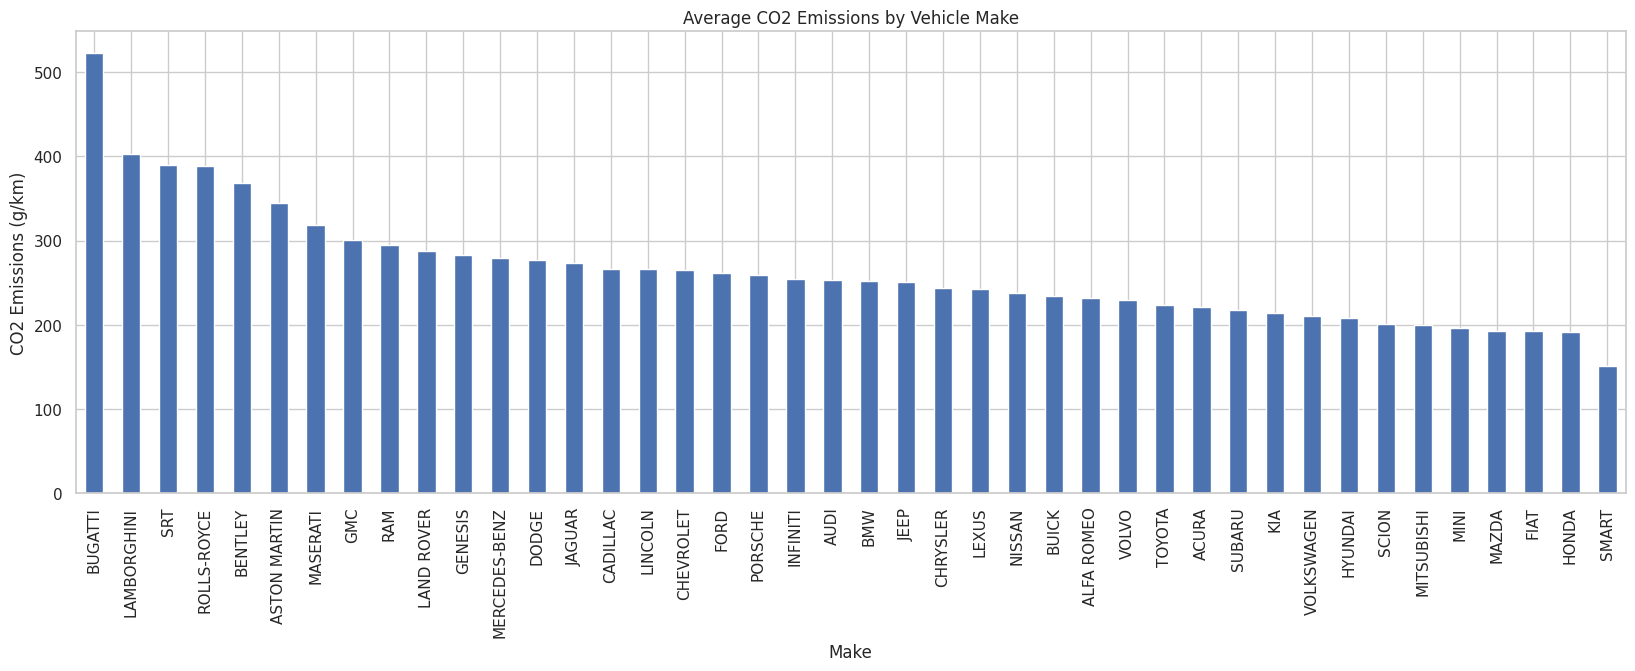

In [ ]:
avg_co2_by_brands = df.groupby("make")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(20,6))
avg_co2_by_brands.plot(kind="bar")
plt.title("Average CO2 Emissions by Vehicle Make")
plt.xlabel("Make")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

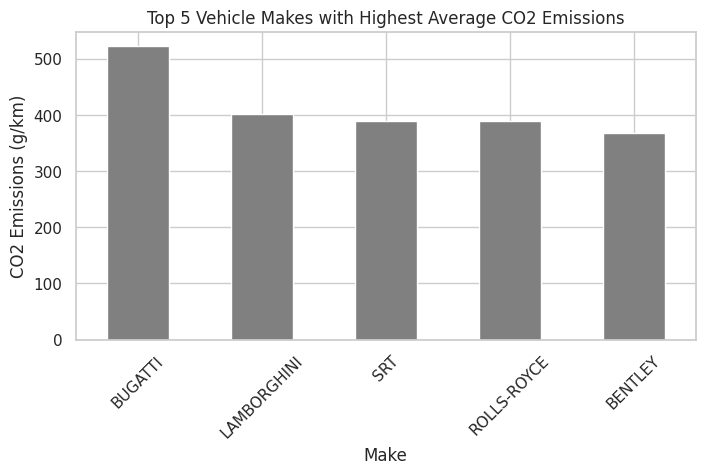

In [ ]:
avg_co2_by_brands = df.groupby("make")["co2"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
avg_co2_by_brands.plot(kind="bar", color="grey")
plt.title("Top 5 Vehicle Makes with Highest Average CO2 Emissions")
plt.xlabel("Make")
plt.ylabel("CO2 Emissions (g/km)")
plt.xticks(rotation=45)
plt.show()

### Which Engine size emits the most CO2?

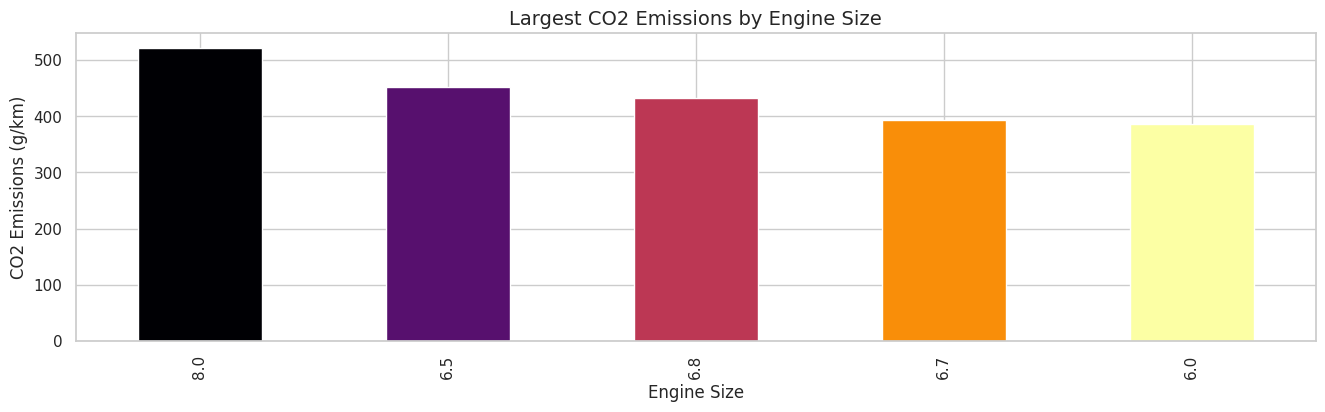

In [ ]:
avg_co2_by_engine = df.groupby("engine_size")["co2"].mean().sort_values(ascending=False)
top_avg_co2_by_engine = avg_co2_by_engine.nlargest(5)

plt.figure(figsize=(16, 4))
colors = plt.cm.inferno(np.linspace(0, 1, len(top_avg_co2_by_engine)))
top_avg_co2_by_engine.plot(kind="bar", color=colors)

plt.title("Largest CO2 Emissions by Engine Size", fontsize=14)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("CO2 Emissions (g/km)", fontsize=12)

plt.show()

### Which Fuel Type emits the most CO2?

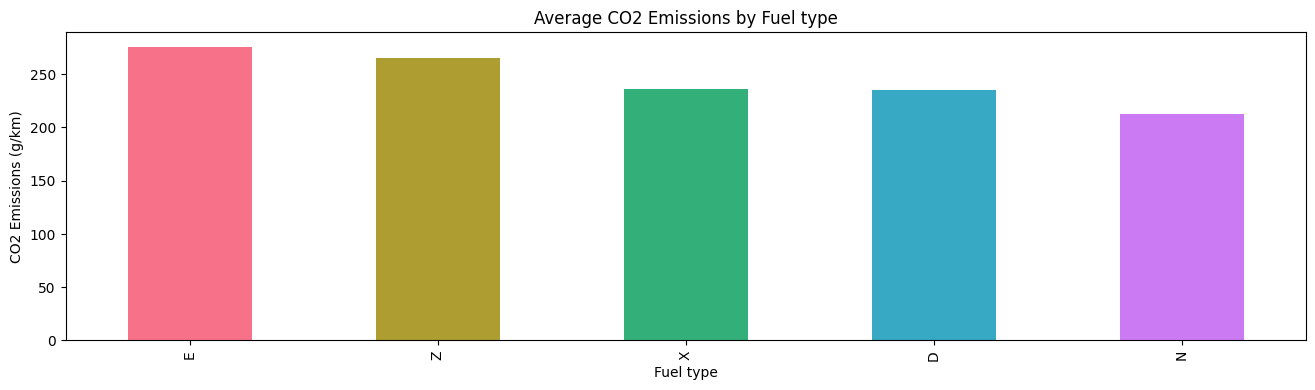

In [ ]:
avg_co2_by_engine = df.groupby("fuel_type")["co2"].mean().sort_values(ascending=False)
fuel_types = avg_co2_by_engine.index
colors = sns.color_palette("husl", len(fuel_types))

plt.figure(figsize=(16,4))
avg_co2_by_engine.plot(kind="bar", color=colors)
plt.title("Average CO2 Emissions by Fuel type")
plt.xlabel("Fuel type")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Which Vehicle class emits the most CO2?

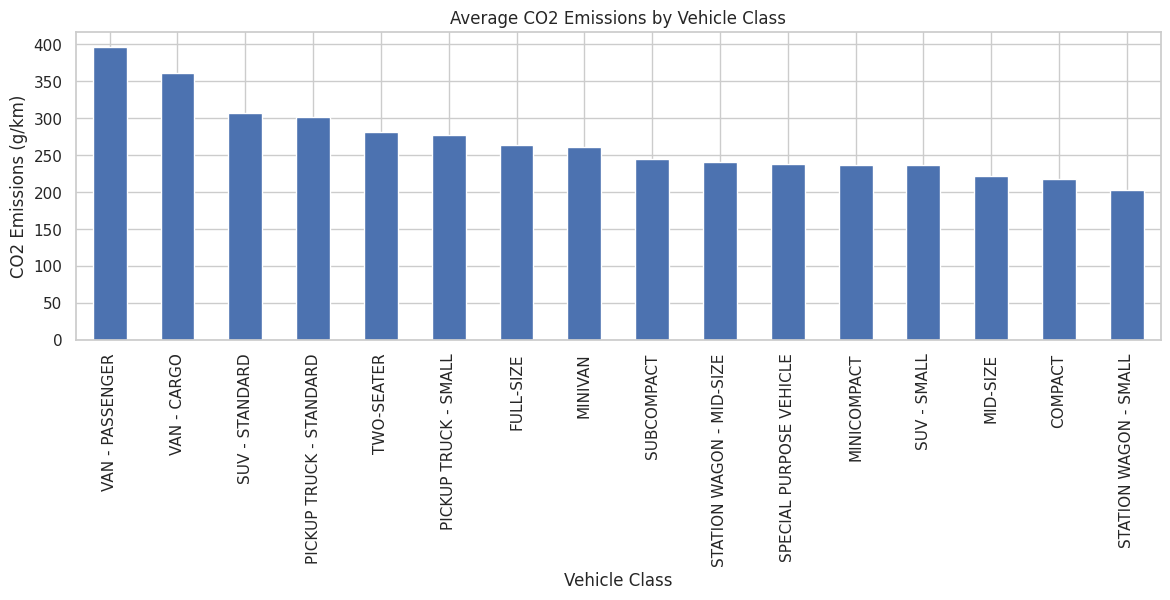

In [ ]:
avg_co2_by_class = df.groupby("vehicle_class")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Fuel Consumption by City vs CO2

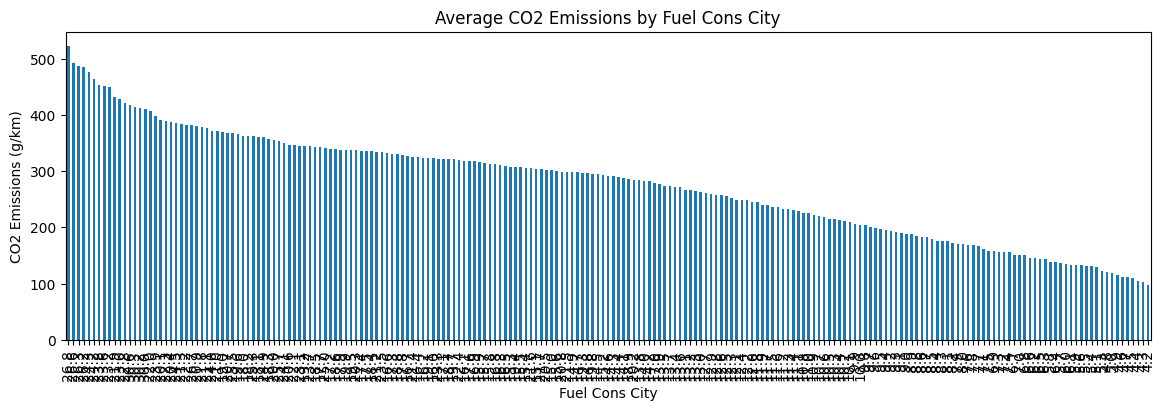

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_city")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons City")
plt.xlabel("Fuel Cons City")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

###Fuel Consumption by Highway

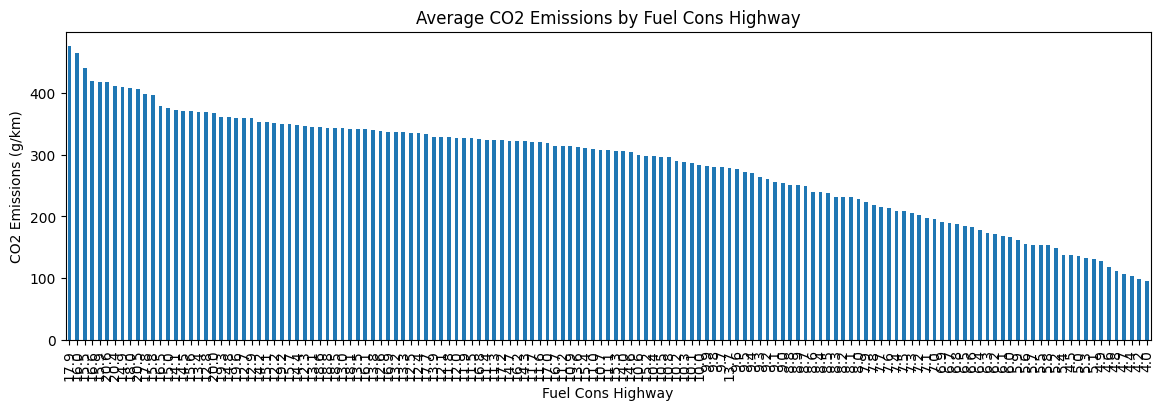

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_hwy")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons Highway")
plt.xlabel("Fuel Cons Highway")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Fuel Consumption by Comb

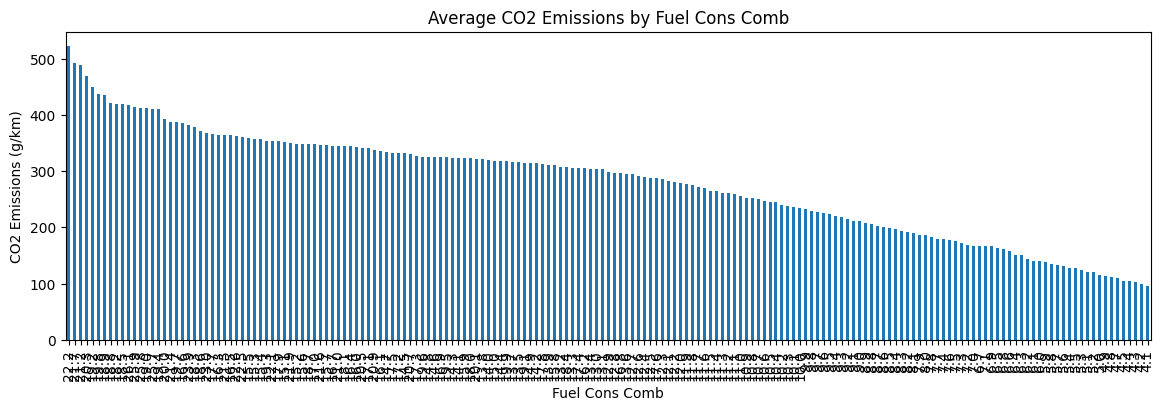

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_comb")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons Comb")
plt.xlabel("Fuel Cons Comb")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### MPG Fuel Consumption by Comb

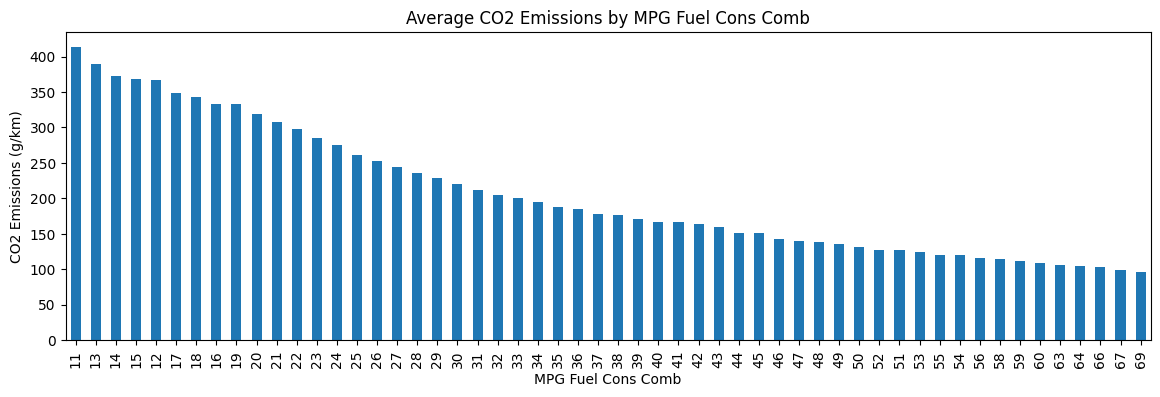

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_comb_mpg")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by MPG Fuel Cons Comb")
plt.xlabel("MPG Fuel Cons Comb")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

## Bivariate (Categorical features correlation with CO2 Emission)

## Univariate (Distributions of Features)

### Distribution of numerical values

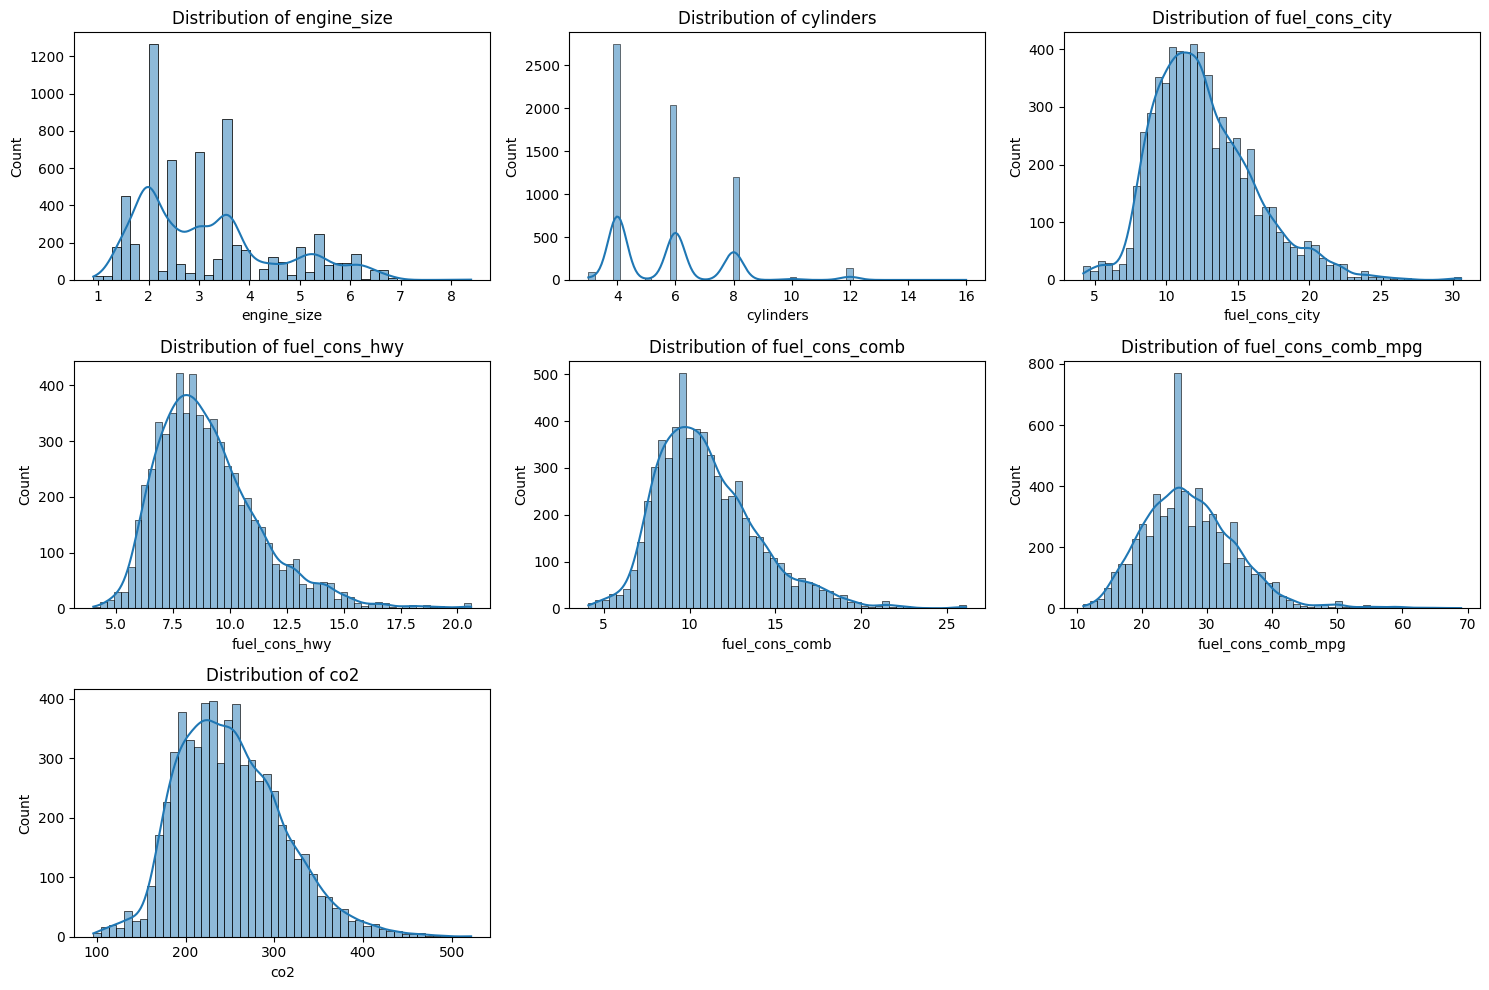

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

### Distribution of CO2 Emissions in Canada

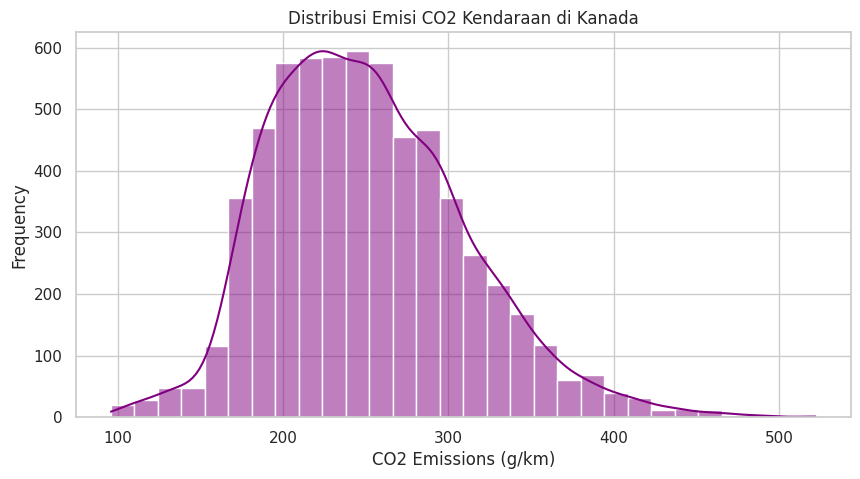

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["co2"], bins=30, kde=True, color="purple")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.title("Distribusi Emisi CO2 Kendaraan di Kanada")
plt.show()

### Distributions of Fuel Consumption by City

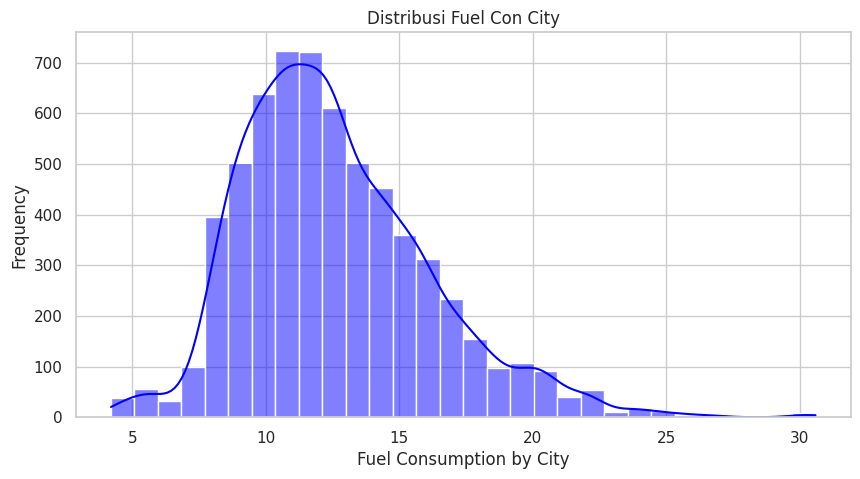

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_city"], bins=30, kde=True, color="blue")
plt.xlabel("Fuel Consumption by City")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con City")
plt.show()

### Distributioin of Fuel Consumption by Highway

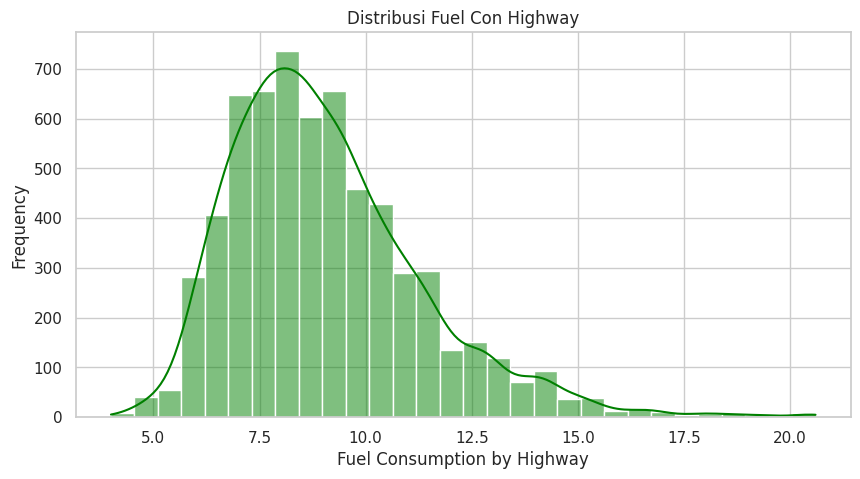

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_hwy"], bins=30, kde=True, color="green")
plt.xlabel("Fuel Consumption by Highway")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con Highway")
plt.show()

### Distribution of Fuel Consumption by Comb

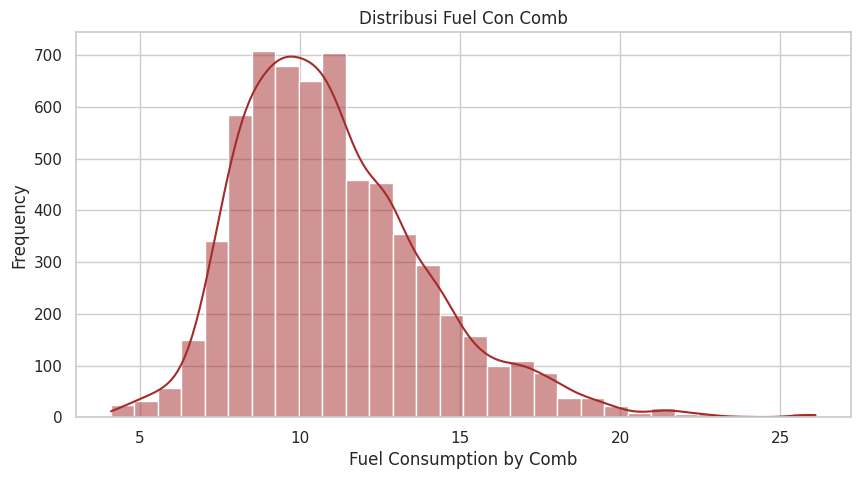

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_comb"], bins=30, kde=True, color="brown")
plt.xlabel("Fuel Consumption by Comb")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con Comb")
plt.show()

### Distribution of MPG Fuel Consumption by Comb

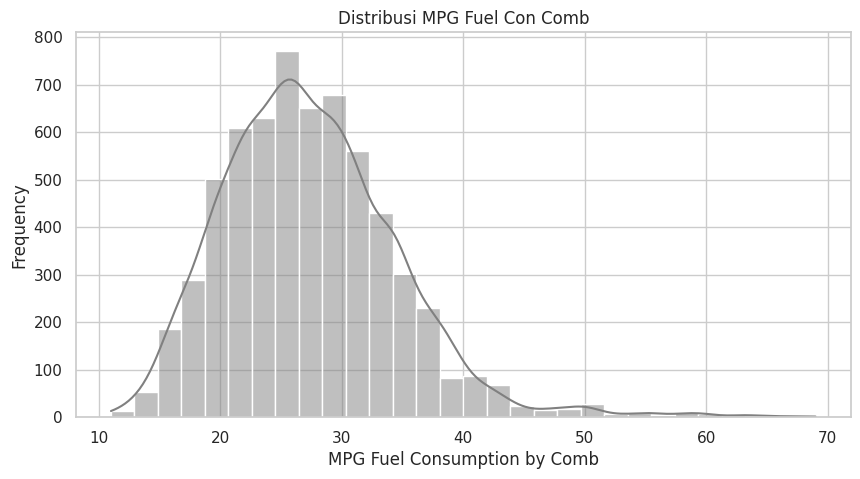

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_comb_mpg"], bins=30, kde=True, color="grey")
plt.xlabel("MPG Fuel Consumption by Comb")
plt.ylabel("Frequency")
plt.title("Distribusi MPG Fuel Con Comb")
plt.show()

## Perbandingan Rata-rata CO2 Emission dengan Numerical & Categorical Features

In [ ]:
from itertools import combinations
import scipy.stats as stats

categorical_cols = ['make', 'model', 'transmission', 'vehicle_class']

def chi_square_test(df, categorical_cols):
    results = []
    for col1, col2 in combinations(categorical_cols, 2):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        results.append((col1, col2, chi2, p))

    result_df = pd.DataFrame(results, columns=['Column 1', 'Column 2', 'Chi-Square', 'P-Value'])
    return result_df.sort_values(by='P-Value')

chi_square_results = chi_square_test(df, categorical_cols)
print(chi_square_results)


       Column 1       Column 2     Chi-Square  P-Value
0          make          model  257562.000000      0.0
1          make   transmission   28979.719034      0.0
2          make  vehicle_class   12639.524099      0.0
3         model   transmission  107728.987948      0.0
4         model  vehicle_class   92601.611091      0.0
5  transmission  vehicle_class    9439.016887      0.0
